In [1]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statistics
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statistics

from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import svm
from sklearn.metrics import hamming_loss
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from scipy.spatial import distance

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

1.Multi-class and Multi-Label Classification Using Support Vector Machines

(a)Download the Anuran Calls (MFCCs) Data Set from:https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the datarandomly as the training set.

In [2]:
data=pd.read_csv("C:\\Users\\D\\Downloads\\Anuran Calls (MFCCs)\\Frogs_MFCCs.csv",sep=",",header=0)


In [3]:
trainX=data.drop(["Family","Genus","Species","RecordID"],axis=1)
trainY=data.loc[:,["Family","Genus","Species"]]
trainX,testX,trainY,testY=train_test_split(trainX,trainY,test_size=0.3)

Each instance has three labels: Families, Genus, and Species. Each of the labelshas multiple classes. We wish to solve a multi-class and multi-label problem.One of the most important approaches to multi-class classification is to train aclassifier for each label. We first try this approach:

Train a SVM for each of the labels, using Gaussian kernels and one versusall classifiers. Determine the weight of the SVM penalty and the width ofthe Gaussian Kernel using 10 fold cross validation.1You are welcome to tryto solve the problem with both standardized2and raw attributes and reportthe results.

In [4]:
penalties = np.linspace(0.0001,1,10)
gammas = np.linspace(0.00001,1,10)
df_testY=pd.DataFrame(testY)

In [37]:
columns=["Family","Genus","Species"]
for curr in columns:
    curr_score={}
    for l in penalties:
        for g in gammas:
            svm_curr_model=svm.SVC(kernel='rbf',decision_function_shape='ovr',C=l,gamma=g)
            svm_curr_score=cross_val_score(svm_curr_model,trainX,trainY[curr],cv=10,scoring=make_scorer(hamming_loss))
            curr_score[(l,g)]=np.mean(svm_curr_score)
    opt_param=min(curr_score,key=curr_score.get)
    print(opt_param)
    best_svm_curr_model=svm.SVC(kernel='rbf',decision_function_shape='ovr',C=opt_param[0],gamma=opt_param[1])
    best_svm_curr_model.fit(trainX,trainY[curr])
    new_label=curr+"_dummy"
    predY=best_svm_curr_model.predict(testX)
    df_testY[new_label]=predY
    curr_hamming_score=hamming_loss(testY[curr],predY)
    print("LABEL:",curr,"Optimal lambda:", opt_param[0],"Optimal gamma:", opt_param[1],"Hamming Loss:",curr_hamming_score)
df_true=df_testY[columns].values
df_pred_vals=df_testY.drop(columns,axis=1).values
loss = np.sum(np.not_equal(df_true,df_pred_vals))/(3* float(df_true.size))
print("The hamming loss of SVM classification for the whole dataset" , loss)

    

(1.0, 1.0)
LABEL: Family Optimal lambda: 1.0 Optimal gamma: 1.0 Hamming Loss: 0.013432144511347846
(1.0, 1.0)
LABEL: Genus Optimal lambda: 1.0 Optimal gamma: 1.0 Hamming Loss: 0.01713756368689208
(0.8889, 1.0)
LABEL: Species Optimal lambda: 0.8889 Optimal gamma: 1.0 Hamming Loss: 0.01667438628994905
The hamming loss of SVM classification for the whole dataset 0.005249343832020997


Repeat 1(b)ii withL1-penalized SVMs.3Remember to standardize4the at-tributes. Determine the weight of the SVM penalty using 10 fold cross vali-dation

In [41]:
columns=["Family","Genus","Species"]
for curr in columns:
    curr_score={}
    for l in penalties:
            svm_curr_model=svm.LinearSVC(penalty='l1',dual=False,tol=0.0001,multi_class='ovr',C=l)
            svm_curr_score=cross_val_score(svm_curr_model,trainX,trainY[curr],cv=10,scoring=make_scorer(hamming_loss))
            curr_score[l]=np.mean(svm_curr_score)
    opt_param=min(curr_score,key=curr_score.get)
#     print(opt_param)
    best_svm_curr_model=svm.LinearSVC(penalty='l1',dual=False,tol=0.0001,multi_class='ovr',C=opt_param)
    best_svm_curr_model.fit(trainX,trainY[curr])
    new_label=curr+"_dummy"
    predY=best_svm_curr_model.predict(testX)
    df_testY[new_label]=predY
    curr_hamming_score=hamming_loss(testY[curr],predY)
    print("LABEL:",curr,"Optimal lambda:", opt_param,"Hamming Loss:",curr_hamming_score)
df_true=df_testY[columns].values
df_pred_vals=df_testY.drop(columns,axis=1).values
loss = np.sum(np.not_equal(df_true,df_pred_vals))/(3* float(df_true.size))
print("The hamming loss of SVM classification for the whole dataset" , loss)

    

LABEL: Family Optimal lambda: 0.4445 Hamming Loss: 0.06299212598425197
LABEL: Genus Optimal lambda: 1.0 Hamming Loss: 0.05604446503010653
LABEL: Species Optimal lambda: 1.0 Hamming Loss: 0.042612320518758684
The hamming loss of SVM classification for the whole dataset 0.017960990170346355


In [5]:
# sm=SMOTE()

Repeat 1(b)iii by using SMOTE or any other method you know to remedyclass imbalance. Report your conclusions about the classifiers you trained.

In [10]:
columns=["Family","Genus","Species"]
for curr in columns:
    curr_score={}
    for l in penalties:
            svm_curr_model=svm.LinearSVC(penalty='l1',dual=False,tol=0.0001,multi_class='ovr',C=l,class_weight="balanced")
            svm_curr_score=cross_val_score(svm_curr_model,trainX,trainY[curr],cv=10,scoring=make_scorer(hamming_loss))
            curr_score[l]=np.mean(svm_curr_score)
    opt_param=min(curr_score,key=curr_score.get)
#     print(opt_param)
    best_svm_curr_model=svm.LinearSVC(penalty='l1',dual=False,tol=0.0001,multi_class='ovr',C=opt_param,class_weight="balanced")
    best_svm_curr_model.fit(trainX,trainY[curr])
    new_label=curr+"_dummy"
    predY=best_svm_curr_model.predict(testX)
    df_testY[new_label]=predY
    curr_hamming_score=hamming_loss(testY[curr],predY)
    print("LABEL:",curr,"Optimal lambda:", opt_param,"Hamming Loss:",curr_hamming_score)
df_true=df_testY[columns].values
df_pred_vals=df_testY.drop(columns,axis=1).values
loss = np.sum(np.not_equal(df_true,df_pred_vals))/(3* float(df_true.size))
print("The hamming loss of SVM classification for the whole dataset" , loss)

    

LABEL: Family Optimal lambda: 0.7778 Hamming Loss: 0.07225567392311255
LABEL: Genus Optimal lambda: 0.8889 Hamming Loss: 0.06391848077813803
LABEL: Species Optimal lambda: 1.0 Hamming Loss: 0.04585456229735989
The hamming loss of SVM classification for the whole dataset 0.020225412999845607


In [4]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statistics
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statistics

from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import svm
from sklearn.metrics import hamming_loss
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from scipy.spatial import distance

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

2.K-Means Clustering on a Multi-Class and Multi-Label Data SetMonte-Carlo Simulation:Perform the following procedures 50 times, and reportthe average and standard deviation of the 50 Hamming Distances that you calculate.

In [5]:
data=pd.read_csv("C:\\Users\\D\\Downloads\\Anuran Calls (MFCCs)\\Frogs_MFCCs.csv",sep=",",header=0)
trainX=data.drop(["Family","Genus","Species","RecordID"],axis=1)
trainY=data.loc[:,["Family","Genus","Species"]]

In [6]:
def count_genus(curr):
    return trainY[trainY['clusters']==curr]["Genus"].value_counts().index[0]

def count_family(curr):
    return trainY[trainY['clusters']==curr]["Family"].value_counts().index[0]

def count_species(curr):
    return trainY[trainY['clusters']==curr]["Species"].value_counts().index[0]

In [7]:
ham_dist_arr=[]
for i in range(0,50):
    ks=np.arange(2,50)
    scores={}
    for k in ks:
        model=KMeans(n_clusters=k).fit(trainX)
        curr_labels=model.labels_
        scores[k]=metrics.calinski_harabaz_score(trainX,curr_labels)
    bestK = max(scores,key=scores.get)
    model=KMeans(n_clusters=bestK).fit(trainX)
    opt_labels=model.labels_
#     print(model.labels_)
    trainY["clusters"]=opt_labels
    labels=["Family","Genus","Species"]
    trainY['Family2']=trainY['clusters'].apply(count_family)
    trainY['Genus2']=trainY['clusters'].apply(count_genus)
    trainY['Species2']=trainY['clusters'].apply(count_species)
    curr_hamming_dist=[]
    for curr_cluster in range(0,bestK):
        curr_cols=trainY[trainY["clusters"]==curr_cluster]
        for label in ["Family","Genus","Species"]:
            curr_label=label+"2"
            curr_dist=distance.hamming(curr_cols[label],curr_cols[curr_label])
            curr_hamming_dist.append(curr_dist)
            print("Hamming score of cluster",curr_cluster,"for label",label," is ",curr_dist)
    avg_dist=np.mean(curr_hamming_dist)
    ham_dist_arr.append(avg_dist)
    print("The average hamming score for",i,"experiment is " , avg_dist)
print("The avg hamming distance for 50 simulations in monte carlo sim is ",np.mean(ham_dist_arr))
print("The standard deviation for hamming distance for 50 simulations in monte carlo sim is ",np.std(ham_dist_arr))

    

Hamming score of cluster 0 for label Family  is  0.03446359088382435
Hamming score of cluster 0 for label Genus  is  0.03557531962201223
Hamming score of cluster 0 for label Species  is  0.03557531962201223
Hamming score of cluster 1 for label Family  is  0.4325827078120656
Hamming score of cluster 1 for label Genus  is  0.5610230747845427
Hamming score of cluster 1 for label Species  is  0.6922435362802335
The average hamming score for 0 experiment is  0.29857725816744846
Hamming score of cluster 0 for label Family  is  0.03446359088382435
Hamming score of cluster 0 for label Genus  is  0.03557531962201223
Hamming score of cluster 0 for label Species  is  0.03557531962201223
Hamming score of cluster 1 for label Family  is  0.4325827078120656
Hamming score of cluster 1 for label Genus  is  0.5610230747845427
Hamming score of cluster 1 for label Species  is  0.6922435362802335
The average hamming score for 1 experiment is  0.29857725816744846
Hamming score of cluster 0 for label Family 

Hamming score of cluster 0 for label Family  is  0.03446359088382435
Hamming score of cluster 0 for label Genus  is  0.03557531962201223
Hamming score of cluster 0 for label Species  is  0.03557531962201223
Hamming score of cluster 1 for label Family  is  0.4325827078120656
Hamming score of cluster 1 for label Genus  is  0.5610230747845427
Hamming score of cluster 1 for label Species  is  0.6922435362802335
The average hamming score for 18 experiment is  0.29857725816744846
Hamming score of cluster 0 for label Family  is  0.03446359088382435
Hamming score of cluster 0 for label Genus  is  0.03557531962201223
Hamming score of cluster 0 for label Species  is  0.03557531962201223
Hamming score of cluster 1 for label Family  is  0.4325827078120656
Hamming score of cluster 1 for label Genus  is  0.5610230747845427
Hamming score of cluster 1 for label Species  is  0.6922435362802335
The average hamming score for 19 experiment is  0.29857725816744846
Hamming score of cluster 0 for label Famil

Hamming score of cluster 0 for label Family  is  0.4325827078120656
Hamming score of cluster 0 for label Genus  is  0.5610230747845427
Hamming score of cluster 0 for label Species  is  0.6922435362802335
Hamming score of cluster 1 for label Family  is  0.03446359088382435
Hamming score of cluster 1 for label Genus  is  0.03557531962201223
Hamming score of cluster 1 for label Species  is  0.03557531962201223
The average hamming score for 36 experiment is  0.29857725816744846
Hamming score of cluster 0 for label Family  is  0.03446359088382435
Hamming score of cluster 0 for label Genus  is  0.03557531962201223
Hamming score of cluster 0 for label Species  is  0.03557531962201223
Hamming score of cluster 1 for label Family  is  0.4325827078120656
Hamming score of cluster 1 for label Genus  is  0.5610230747845427
Hamming score of cluster 1 for label Species  is  0.6922435362802335
The average hamming score for 37 experiment is  0.29857725816744846
Hamming score of cluster 0 for label Famil

ISLR 10.7.2

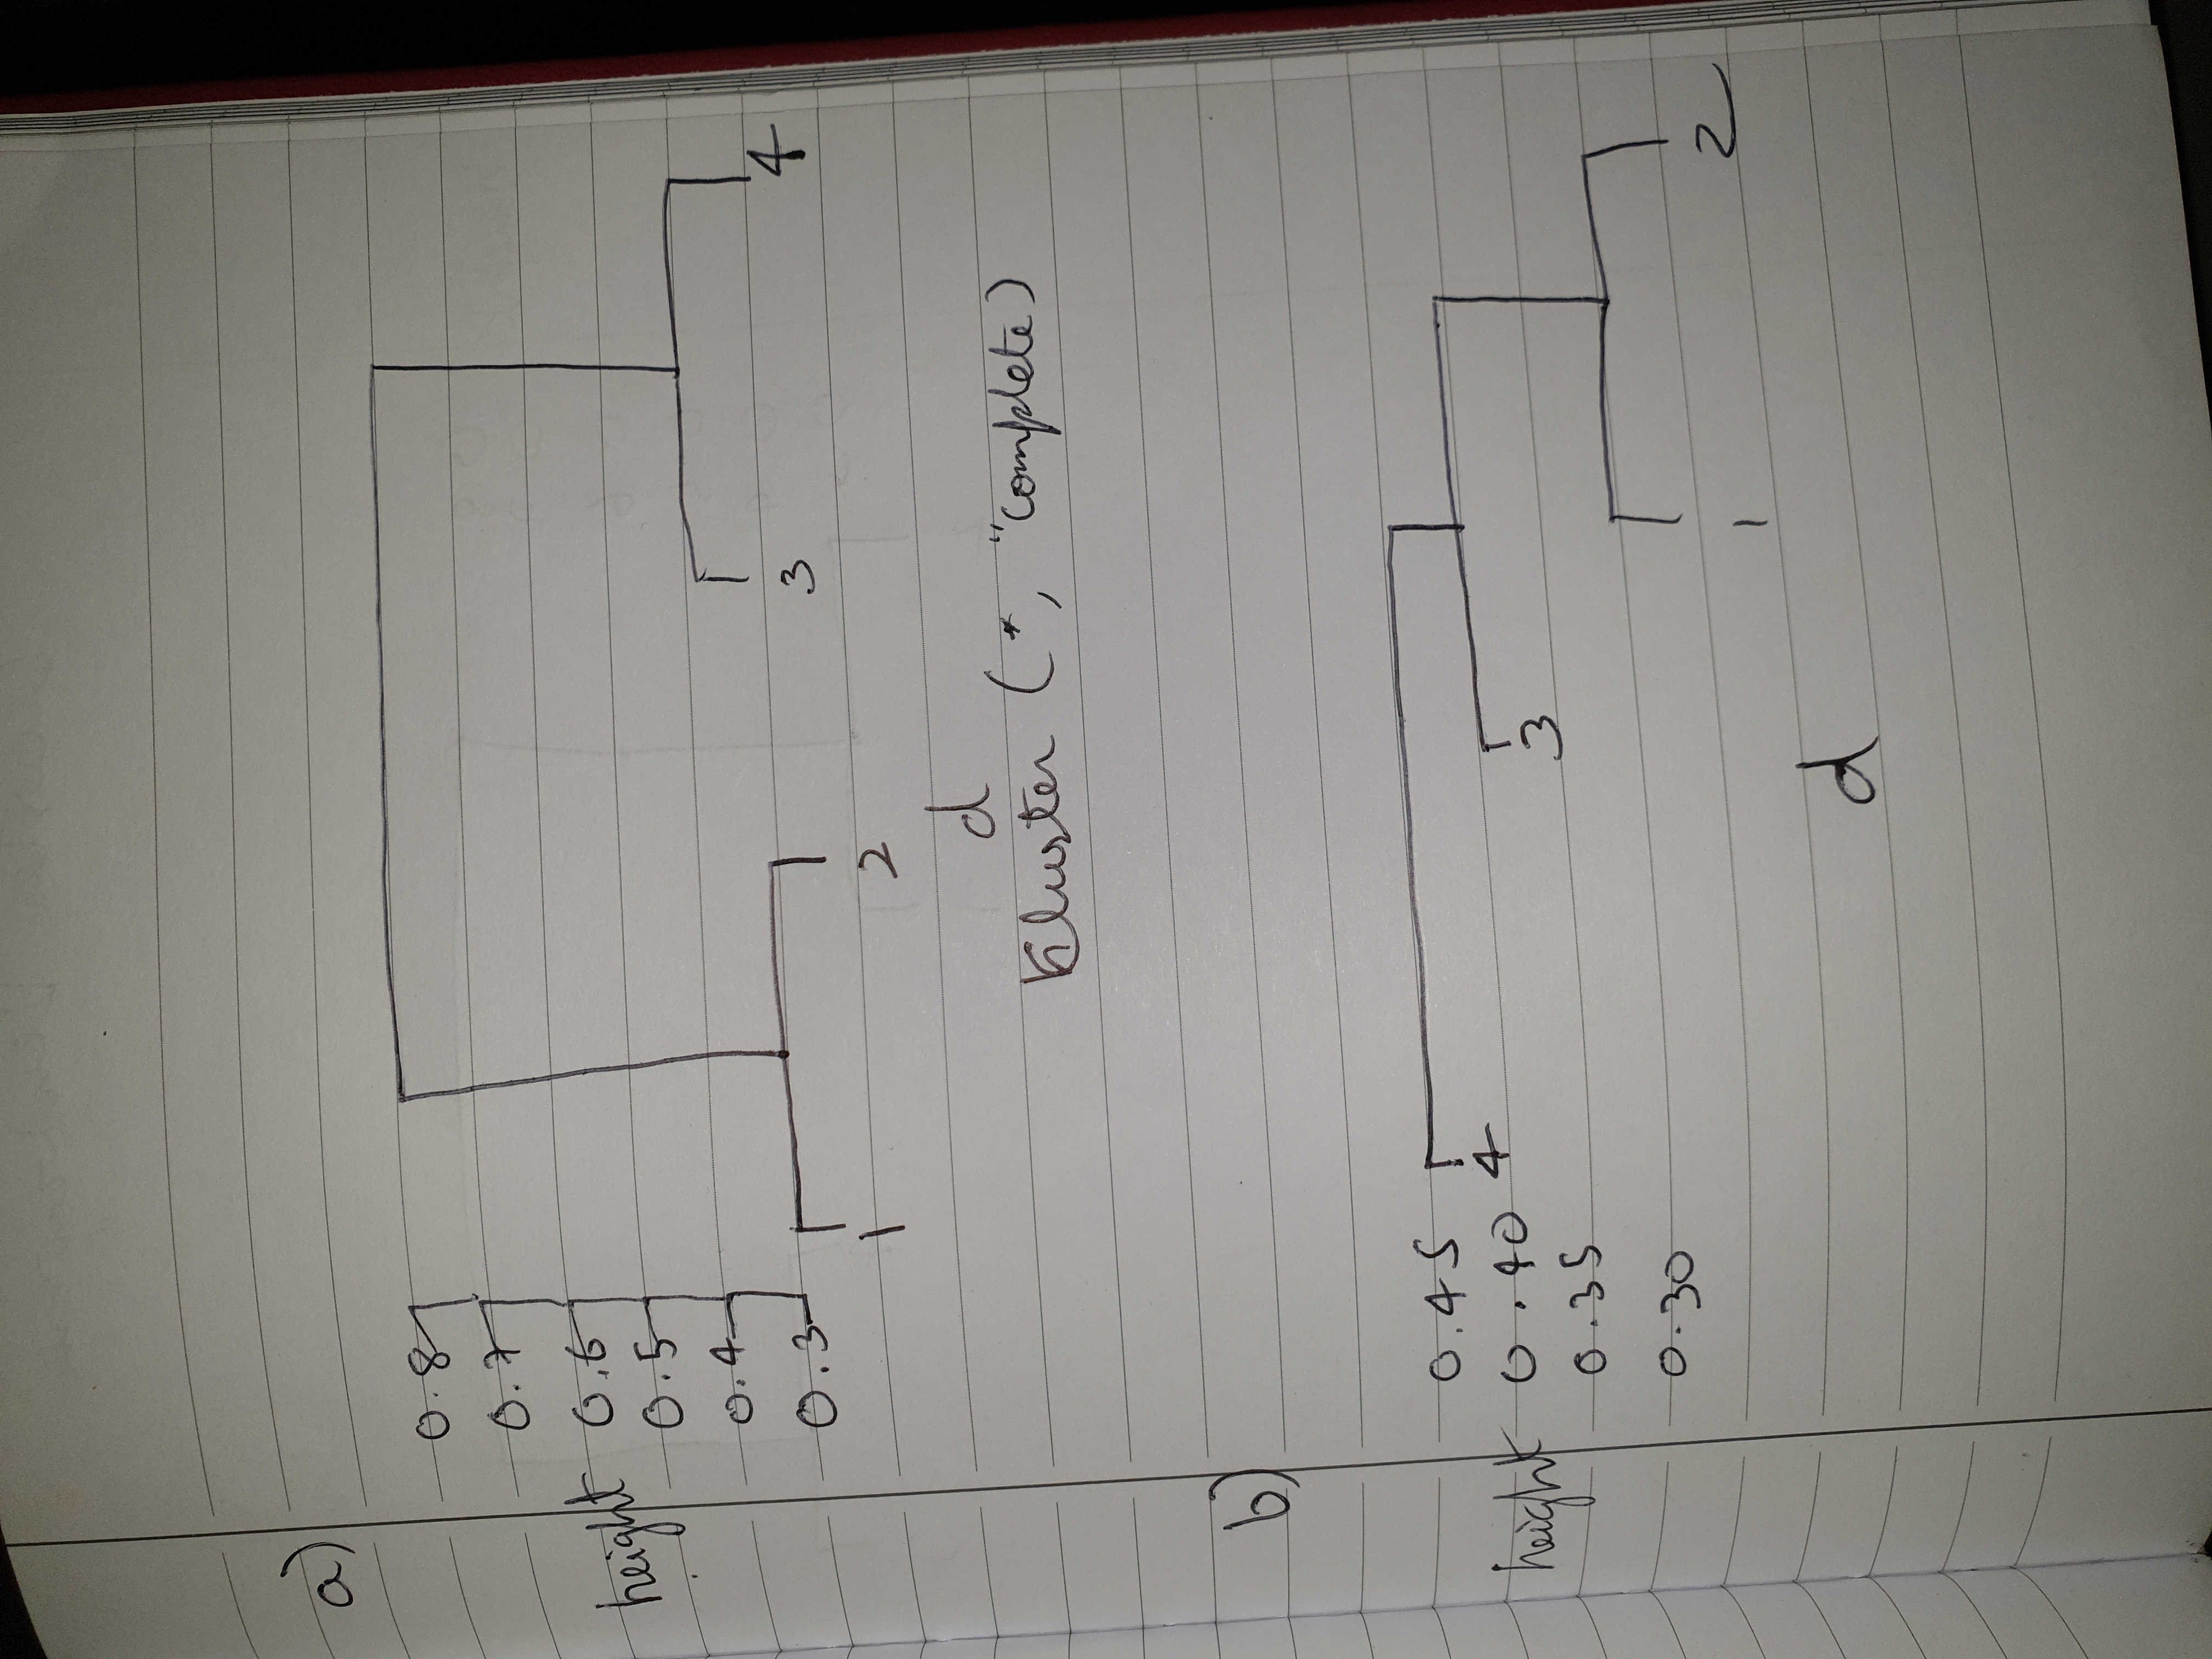

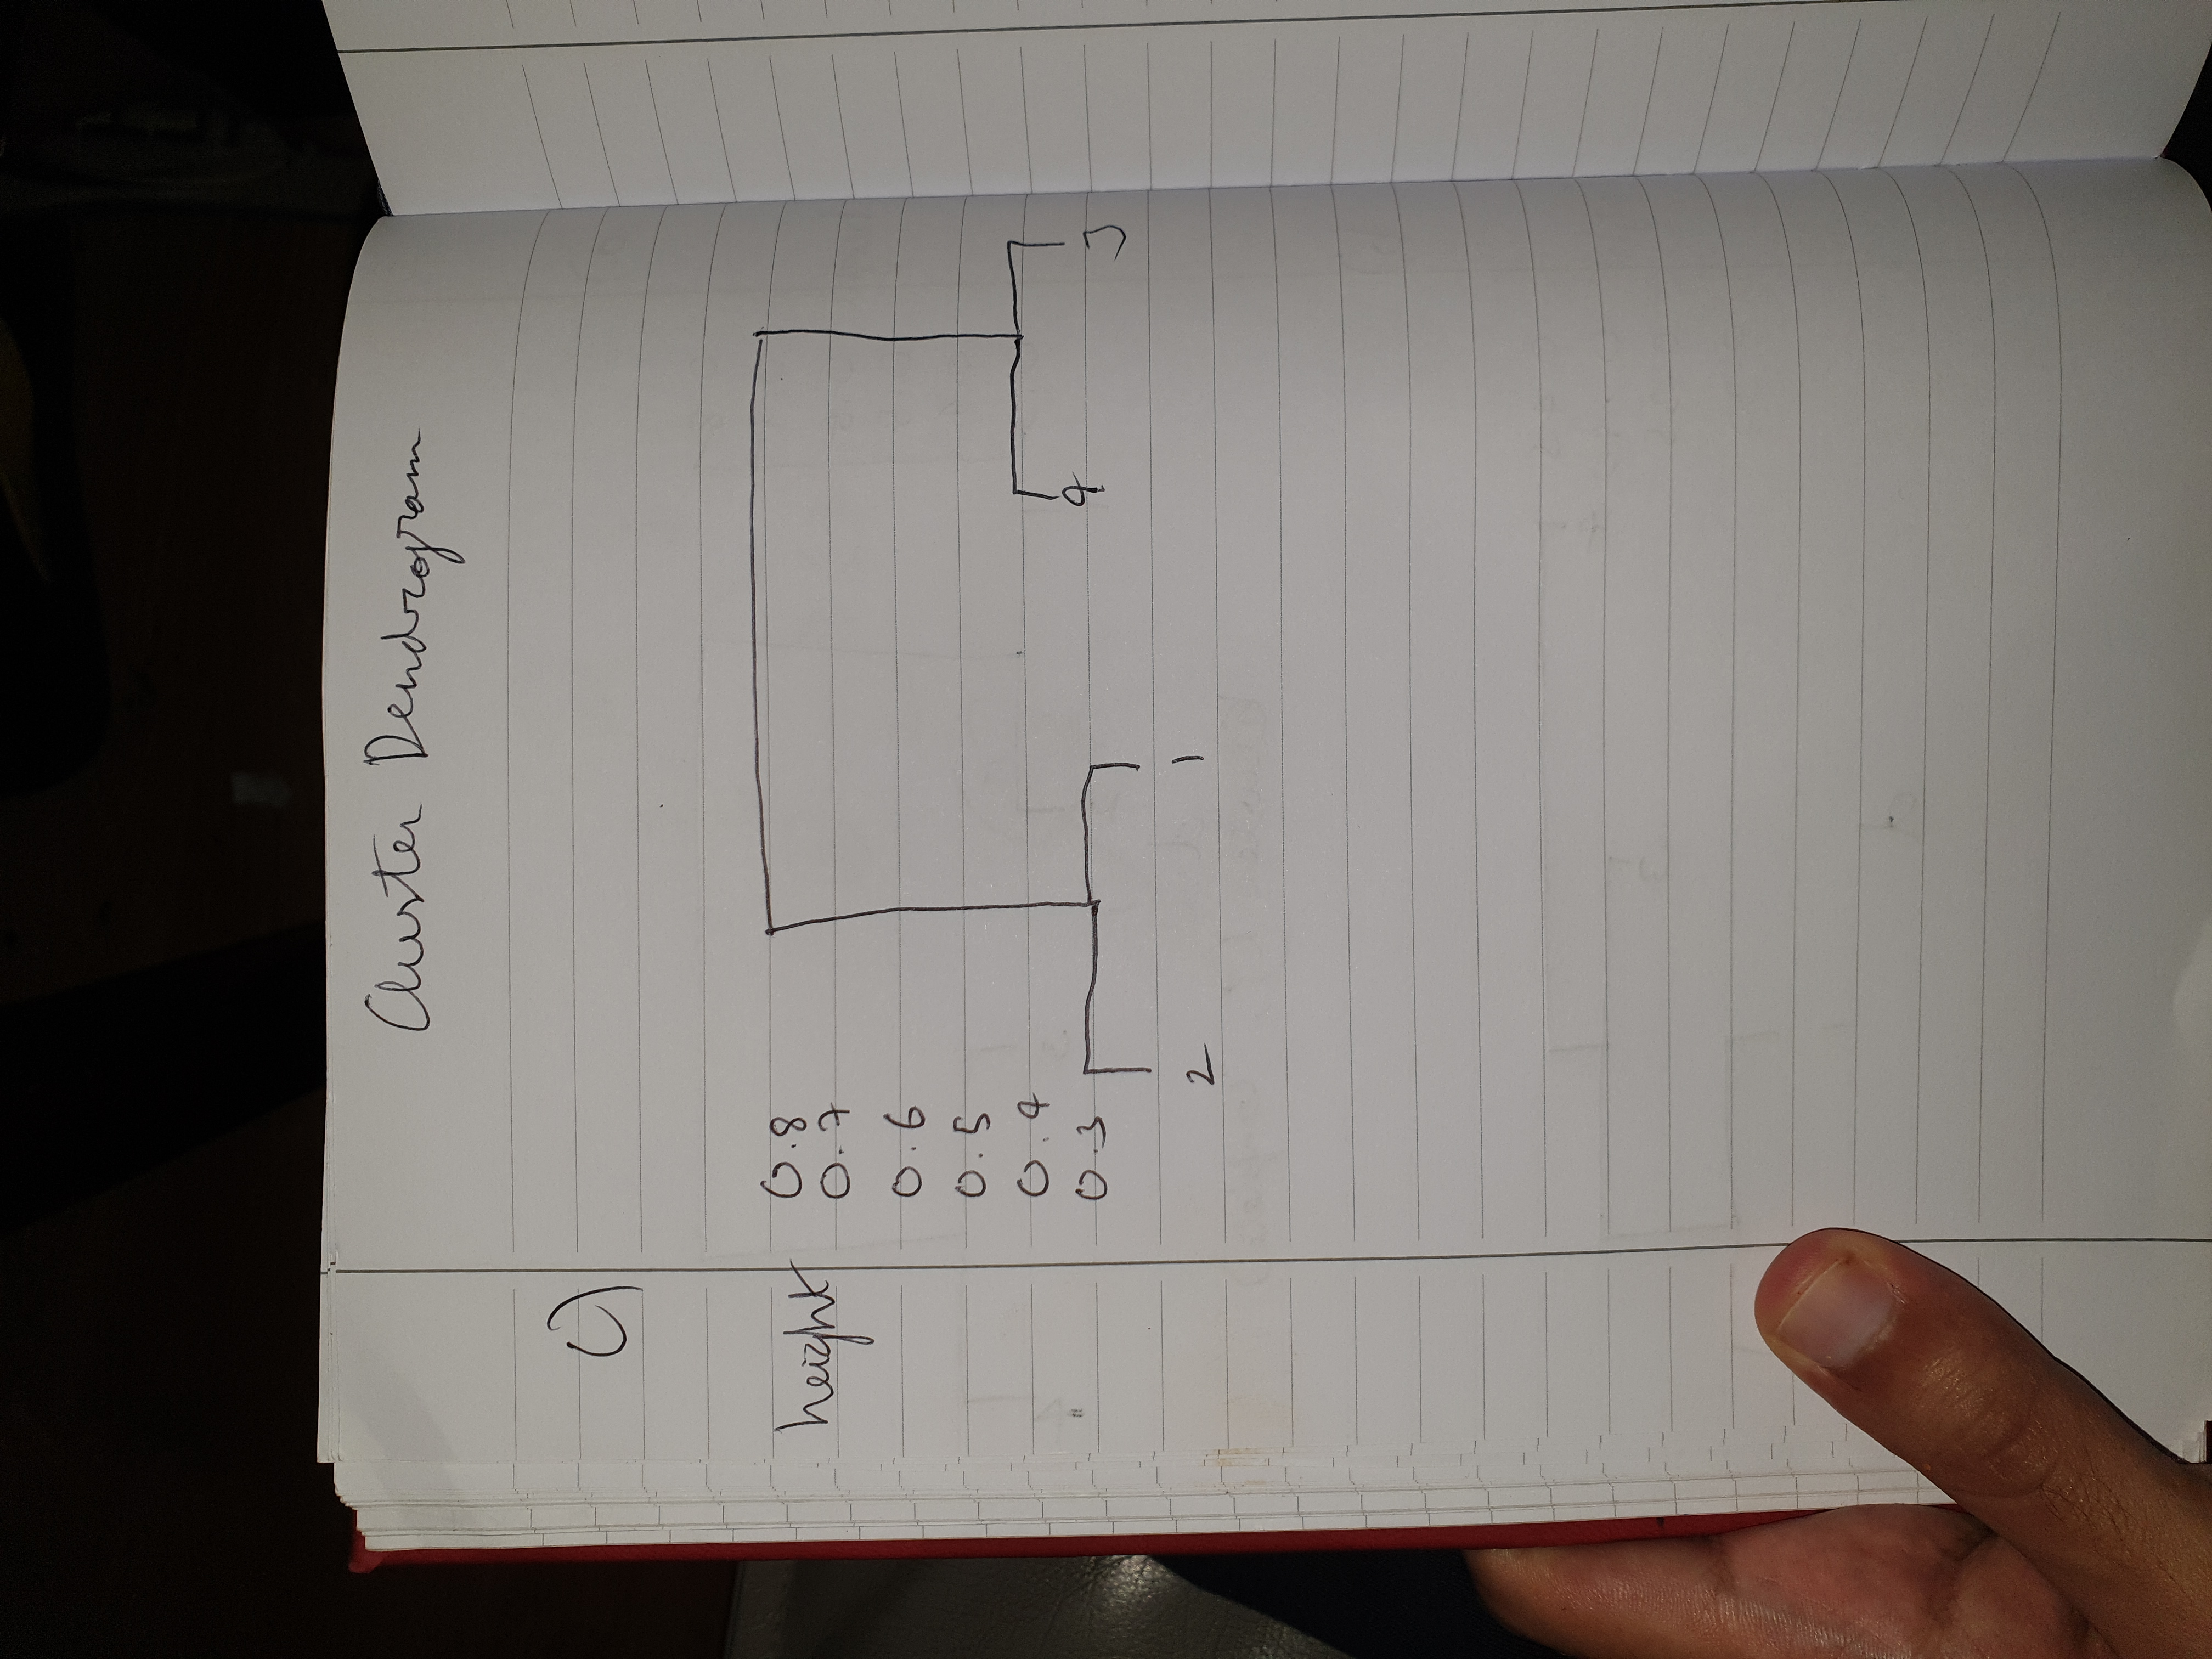